**Random Forrest for Project*

In [18]:
# Load all dependencies and the data
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier, plot_tree

In [19]:
# Add a new column with the country names.
# This is what we are going to try to predict.
# data['country'] = pd.Categorical.from_codes(country, country_names)
    #error


In [20]:
df = pd.read_csv('additional_co2_abs.csv')
df = df.dropna(how='any',axis=1)
df.columns

Index(['Unnamed: 0', 'country', 'year', 'cement_co2', 'coal_co2',
       'flaring_co2', 'gas_co2', 'oil_co2', 'consumption_co2',
       'PM2.5 air pollution - mean annual exposure (micrograms per cubic meter)',
       'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)',
       'category'],
      dtype='object')

In [21]:
df.head()

,Unnamed: 0,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,consumption_co2,PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),category
0,0,Africa,1990,22.801,295.760,20.795,75.954,243.984,456.070,46.719096,169060,26.820034,Africa
1,1,Africa,1991,24.426,306.508,20.799,78.466,258.828,475.983,46.530559,173284,26.768455,Africa
2,2,Africa,1992,24.904,288.587,23.351,74.273,257.562,485.220,46.342022,177903,26.771976,Africa
3,3,Africa,1993,24.609,318.855,21.790,81.722,261.882,500.671,46.153485,183152,26.860278,Africa
4,4,Africa,1994,25.111,330.702,21.797,85.588,256.425,504.509,45.964949,188664,26.973370,Africa


In [22]:
# Convert the country names to a digit (0, 1, 2) for each class.
df['country'] = pd.factorize(df['country'])[0]
df.head(90)

,Unnamed: 0,country,year,cement_co2,coal_co2,flaring_co2,gas_co2,oil_co2,consumption_co2,PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number),category
0,0,0,1990,22.801,295.760,20.795,75.954,243.984,456.070,46.719096,169060,26.820034,Africa
1,1,0,1991,24.426,306.508,20.799,78.466,258.828,475.983,46.530559,173284,26.768455,Africa
2,2,0,1992,24.904,288.587,23.351,74.273,257.562,485.220,46.342022,177903,26.771976,Africa
3,3,0,1993,24.609,318.855,21.790,81.722,261.882,500.671,46.153485,183152,26.860278,Africa
4,4,0,1994,25.111,330.702,21.797,85.588,256.425,504.509,45.964949,188664,26.973370,Africa
...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,85,3,1991,52.197,1948.180,57.573,1247.793,2600.055,5827.175,9.528191,109722,25.359643,North America
86,86,3,1992,52.877,1973.354,58.698,1290.184,2655.655,6039.259,9.501610,109047,24.889542,North America
87,87,3,1993,55.585,2026.203,59.008,1322.542,2674.693,6092.632,9.475030,111159,25.055436,North America
88,88,3,1994,59.479,2044.334,59.804,1354.945,2742.213,6214.441,9.448450,111941,24.913506,North America


Let's now split the entire dataset into a training and testing set.

In [23]:
df['is_train'] = np.random.uniform(0, 1, len(df)) <= 0.75
df.head()

train_df = df[df['is_train']]
test_df  = df[~df['is_train']]

print('Length of train data:', len(train_df))
print('Length of test data :', len(test_df))

Length of train data: 84
Length of test data : 28


Let's now construct the features (input to Decision Tree) and the classes (target of the Decision Tree).

In [24]:
features = df.columns[3:-4]
features

Index(['cement_co2', 'coal_co2', 'flaring_co2', 'gas_co2', 'oil_co2',
       'consumption_co2',
       'PM2.5 air pollution - mean annual exposure (micrograms per cubic meter)'],
      dtype='object')

In [25]:
#df['oil_co2'] = round(df['oil_co2'])
#print(df['oil_co2'])

In [26]:
targets  = df.columns[-4]
targets
#print(df['oil_co2'])

'Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'

We can construct a Decision Tree object and train it.

In [38]:
#df = pd.DataFrame(df)


In [39]:
#df.values.tolist() # as list

In [40]:
clf = DecisionTreeClassifier()


In [41]:
# from sklearn import preprocessing
# from sklearn import utils
#
# #convert y values to categorical values
# lab = preprocessing.LabelEncoder()




In [42]:
# from sklearn import preprocessing
# label_encoder = preprocessing.LabelEncoder()
# train_df = label_encoder.fit_transform(train_df)

In [43]:
clf.fit(train_df[features], train_df[targets])


DecisionTreeClassifier()

Now let's use the trained model to predict the class of test samples. Often it is useful to also display the probabilities with which the algorithm classifies a given sample.

In [44]:
DecisionTreeClassifier()

DecisionTreeClassifier()

In [45]:
clf.predict_proba(test_df[features])


array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

We can create a confusion matrix to show get a quick overview which classes are easy to predict and which ones are more difficult to distinguish.

In [46]:
predict_proba = clf.predict(test_df[features])
pd.crosstab(test_df['country'],
            predict_proba,
            rownames=['Actual Country'], 
            colnames=['Predicted Country'])

Predicted Country,64353,73033,106490,110408,111503,169060,215795,240765,370225,441116,576161,1307105,1443560,1545446,1847321,2118183,2343093,2535778,3199177
Actual Country,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,3,1,1,2,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,1,2,2,1,2,1,2,1
2,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0
3,1,2,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0


Finally we can inspect which features are most important in the classification by reading out the feature importances.

In [47]:
fi = pd.DataFrame(clf.feature_importances_,
                  index=df.columns[3:-4],
                  columns=['rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)'])
fi_sorted = fi.sort_values('rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)', ascending=False)
fi_sorted

# AttributeError: 'DecisionTreeClassifier' object has no attribute 'tree_'

,rate Deaths - Cause: All causes - Risk: Outdoor air pollution - OWID - Sex: Both - Age: All Ages (Number)
cement_co2,0.228916
PM2.5 air pollution - mean annual exposure (micrograms per cubic meter),0.168675
oil_co2,0.144578
coal_co2,0.120482
flaring_co2,0.120482
gas_co2,0.108434
consumption_co2,0.108434


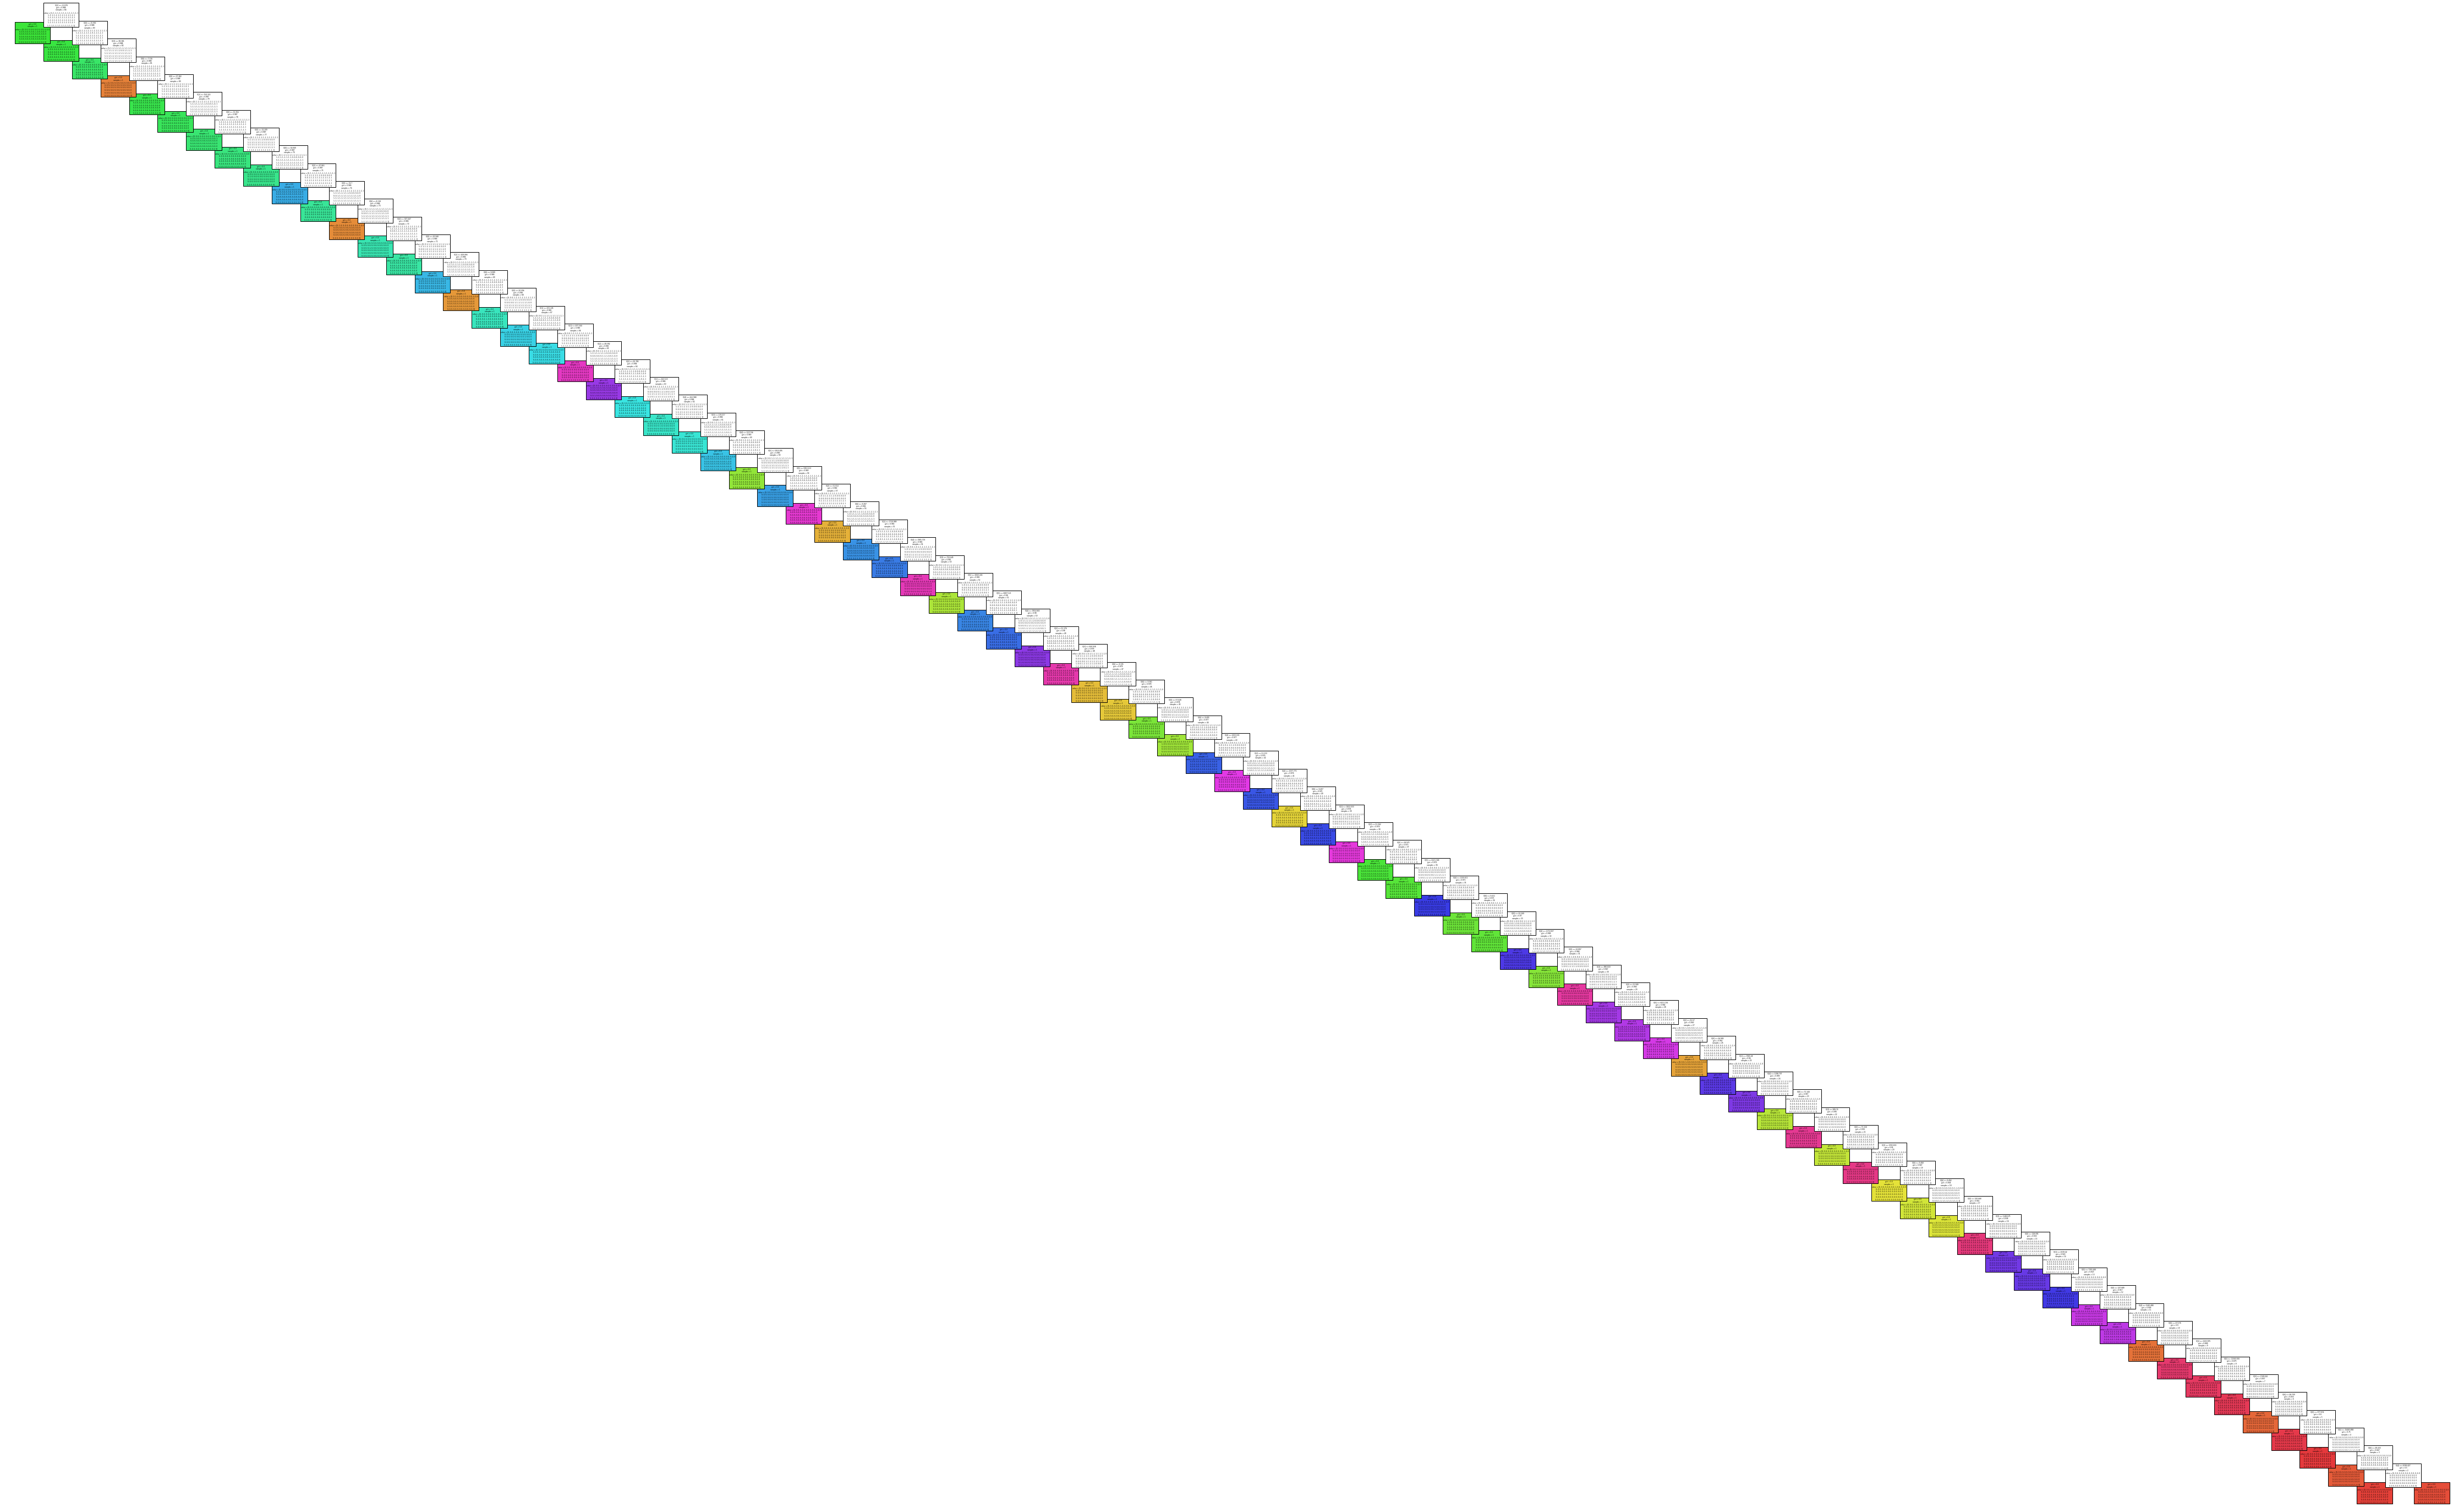

In [49]:
from matplotlib.pylab import rcParams
rcParams['figure.figsize'] = 80,50
tree_fig = plot_tree(clf, filled=True)

[Text(0.023255813953488372, 0.9940476190476191, 'X[2] <= 21.878\ngini = 0.988\nsamples = 84\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]'),
 Text(0.011627906976744186, 0.9821428571428571, 'gini = 0.0\nsamples = 1\nvalue = [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0\n0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]'),
 Text(0.03488372093023256, 0.9821428571428571, 'X[0] <= 25.993\ngini = 0.988\nsamples = 83\nvalue = [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1\n1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 

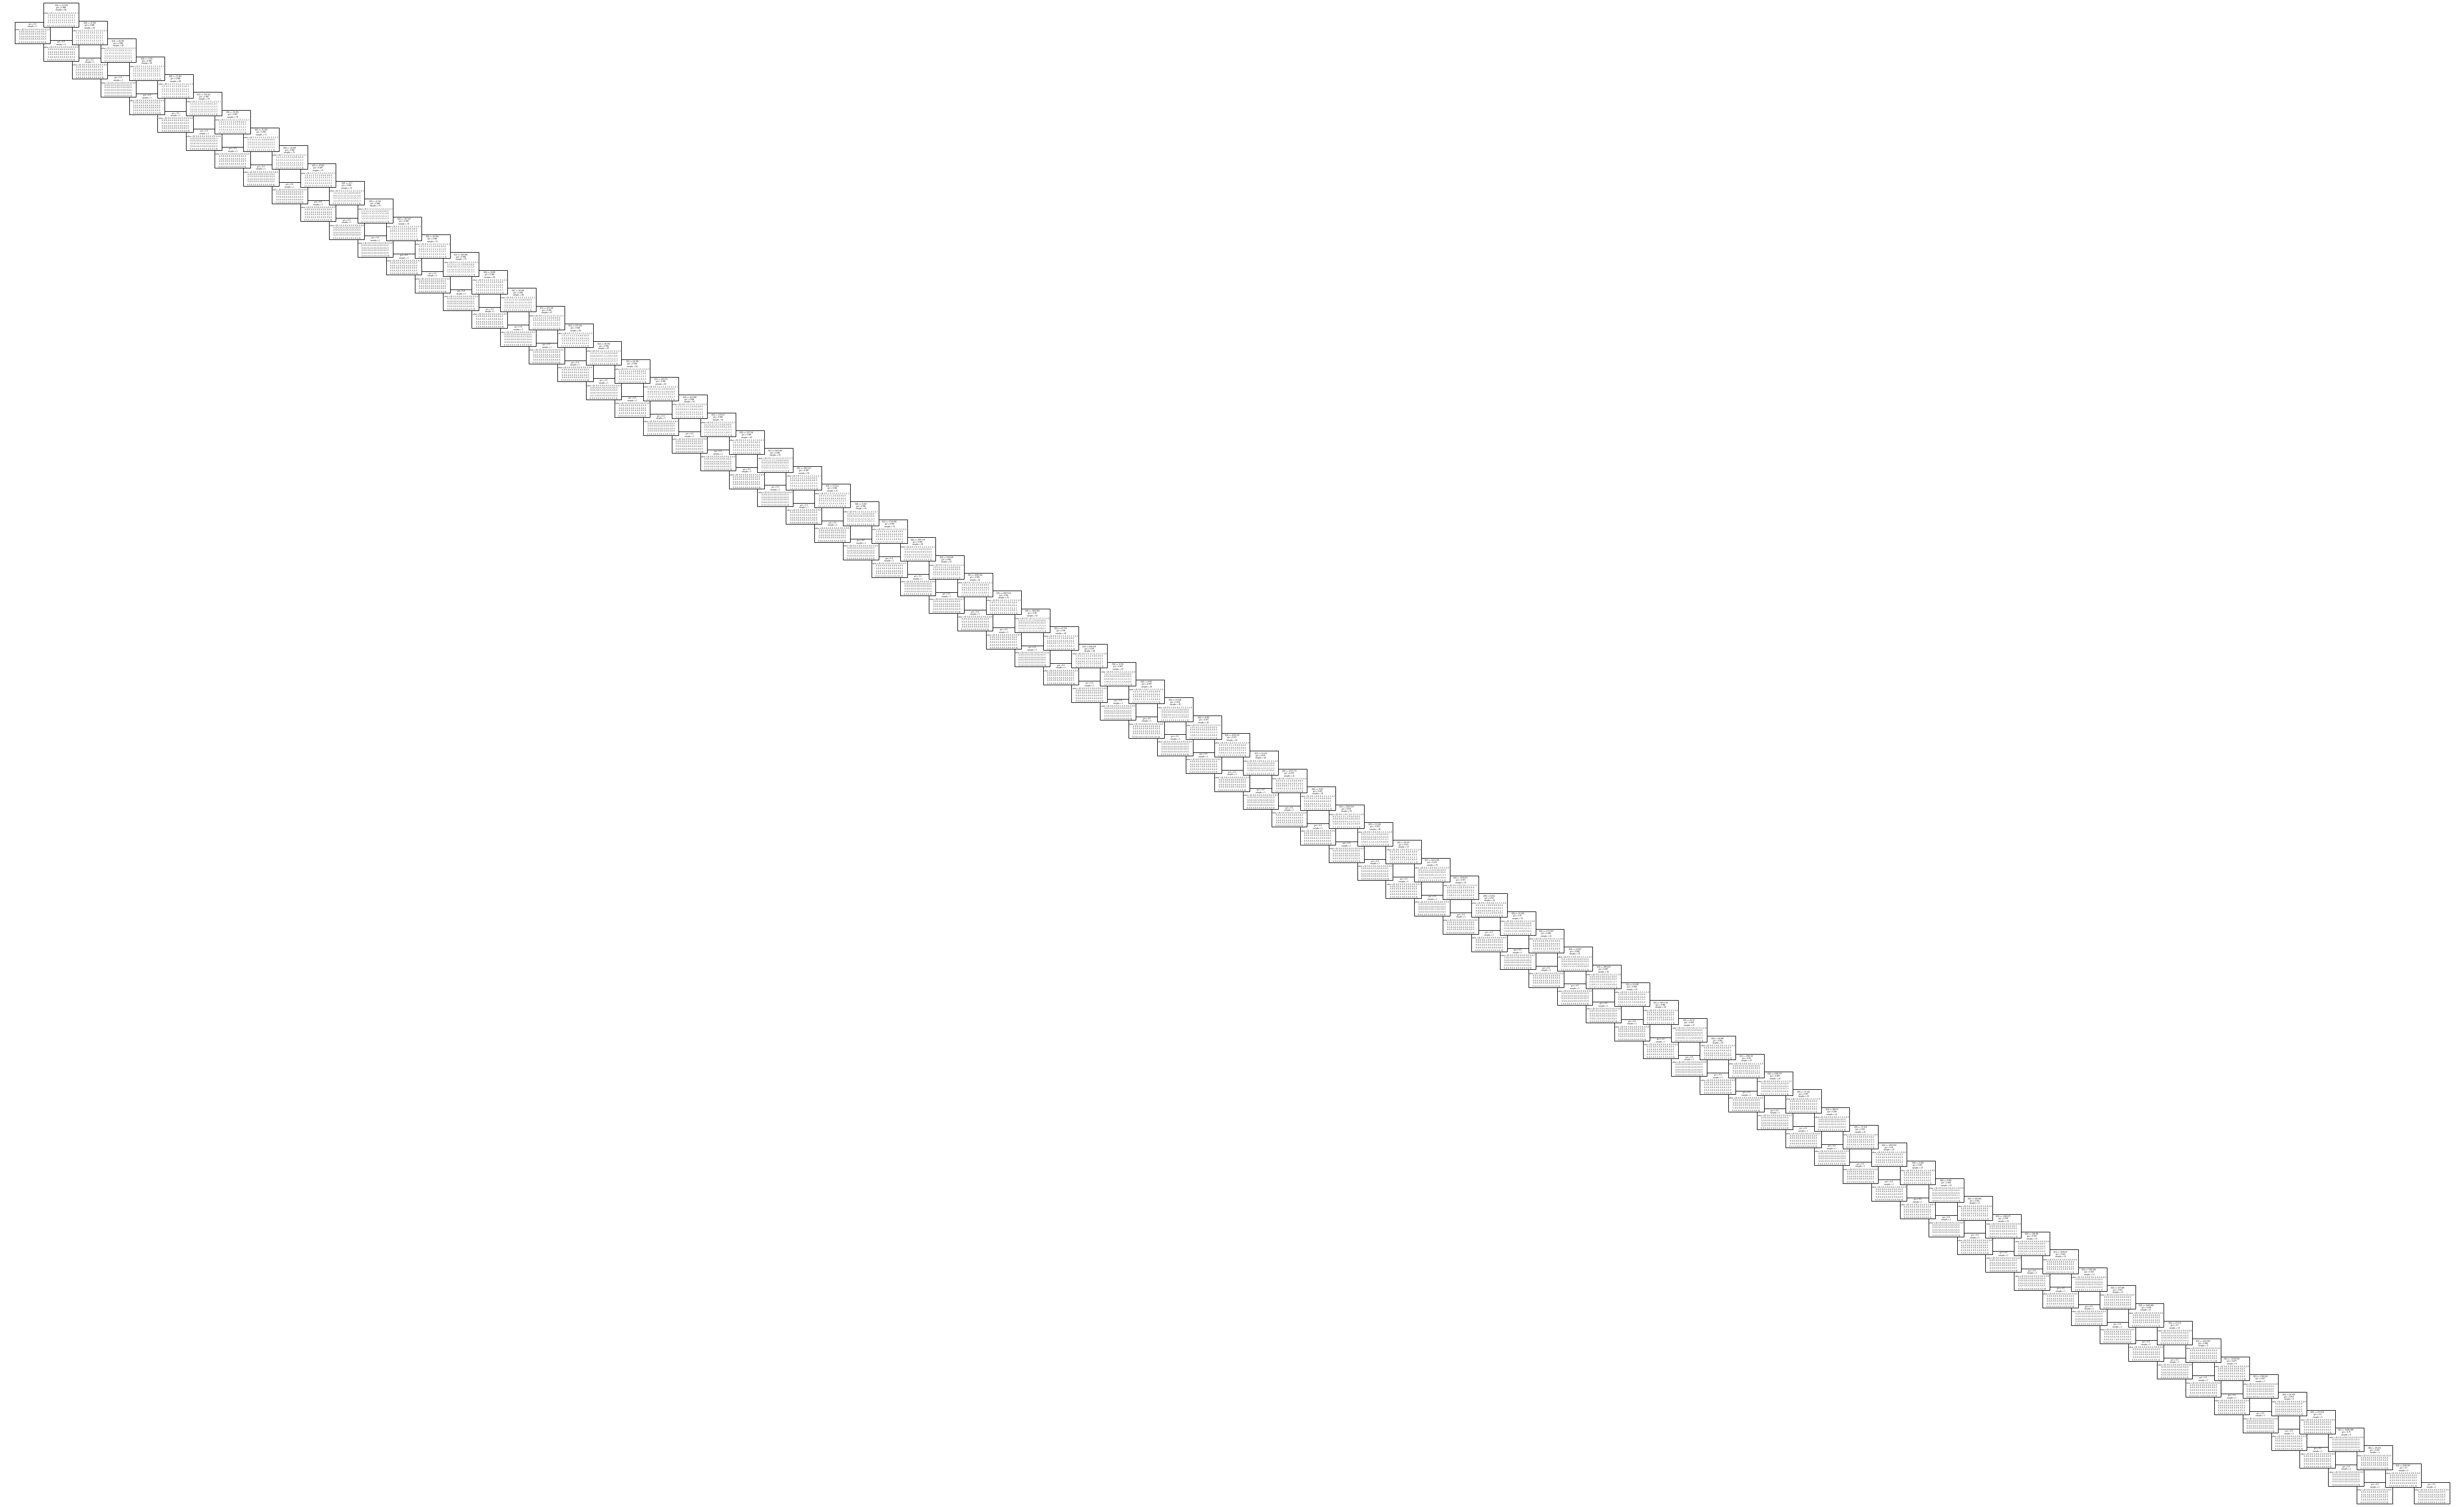

In [50]:
plot_tree(clf)